In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('dailyActivity_merged_updted.csv')
data_info = data.info()
data_description = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  940 non-null    int64  
 1   ActivityDate        940 non-null    object 
 2   TotalSteps          940 non-null    int64  
 3   TotalDistance       940 non-null    float64
 4   VeryActiveDistance  940 non-null    float64
 5   Calories            940 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 44.2+ KB


In [5]:
print(data.head())

           Id ActivityDate  TotalSteps  TotalDistance  VeryActiveDistance  \
0  1503960366     04-12-16       13162           8.50                1.88   
1  1503960366    4/13/2016       10735           6.97                1.57   
2  1503960366    4/14/2016       10460           6.74                2.44   
3  1503960366    4/15/2016        9762           6.28                2.14   
4  1503960366    4/16/2016       12669           8.16                2.71   

   Calories  
0      1985  
1      1797  
2      1776  
3      1745  
4      1863  


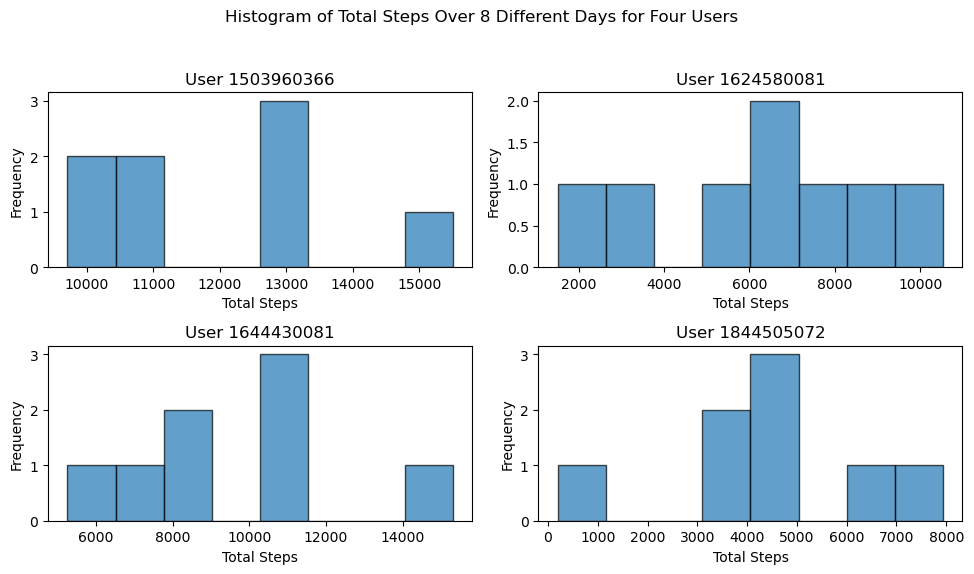

In [12]:
def plot_histogram(data):
    unique_ids = data['Id'].unique()[:4]
    data_selected = data[data['Id'].isin(unique_ids)]
    unique_dates = data_selected['ActivityDate'].dropna().unique()[:8]
    data_selected = data_selected[data_selected['ActivityDate'].isin(unique_dates)]
    plt.figure(figsize=(10, 6))
    for i, user_id in enumerate(unique_ids, 1):
        plt.subplot(2, 2, i)  
        user_data = data_selected[data_selected['Id'] == user_id]
        plt.hist(user_data['TotalSteps'], bins=8, alpha=0.7, edgecolor='black')
        plt.title(f'User {user_id}')
        plt.xlabel('Total Steps')
        plt.ylabel('Frequency')
        
    plt.suptitle("Histogram of Total Steps Over 8 Different Days for Four Users")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
    plt.show()
    
plot_histogram(data)

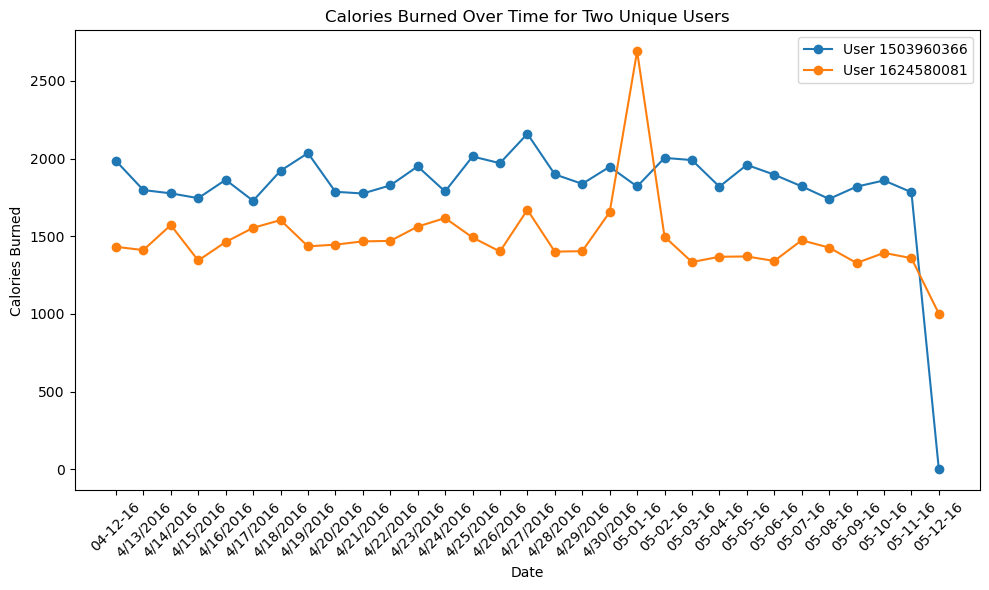

In [19]:
def line_plot(data):
    unique_ids = data['Id'].unique()[:2]
    id1, id2 = unique_ids
    data_id1 = data[data['Id'] == id1]
    data_id2 = data[data['Id'] == id2]
    plt.figure(figsize=(10, 6))
    plt.plot(data_id1['ActivityDate'], data_id1['Calories'], label=f'User {id1}', marker='o')
    plt.plot(data_id2['ActivityDate'], data_id2['Calories'], label=f'User {id2}', marker='o')
    plt.title("Calories Burned Over Time for Two Unique Users")
    plt.xlabel("Date")
    plt.ylabel("Calories Burned")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
line_plot(data)

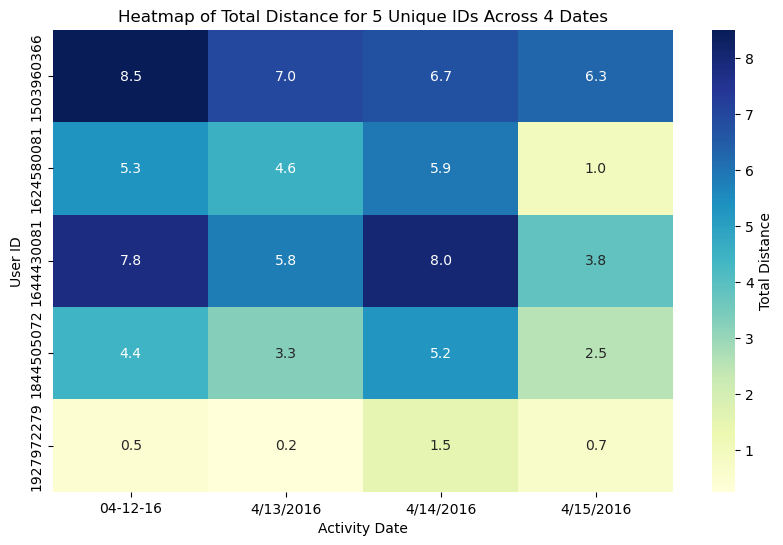

In [17]:
def heatMap(data):
    selected_ids = data['Id'].unique()[:5]
    selected_dates = data['ActivityDate'].unique()[:4] 
    filtered_data_subset = data[(data['Id'].isin(selected_ids)) & (data['ActivityDate'].isin(selected_dates))]
    distance_matrix_subset = filtered_data_subset.pivot_table(index='Id', columns='ActivityDate', values='TotalDistance')
    plt.figure(figsize=(10, 6))
    sns.heatmap(distance_matrix_subset, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Total Distance'})
    plt.title("Heatmap of Total Distance for 5 Unique IDs Across 4 Dates")
    plt.xlabel("Activity Date")
    plt.ylabel("User ID")
    plt.show()
heatMap(data)